***Reference:***

***Ganegedara, Thushan. Natural Language Processing with TensorFlow: The definitive NLP book to implement the most sought-after machine learning models and tasks, 2nd Edition. Packt Publishing.***

# **Chapter 3: Word2Vec - Word Embeddings**

Word2Vec is a technique for numerical representation(vectors)  of words/tokens in a corpus of text. It captures the semantic and contextual information that the word carries.

For e.g., the word *forest* and *oven* have very diff. vector representation as they are rarely used in similar contexts, while the words *forest* and *jungle* should be very similar.

This chapter covers this information through the
following main topics:
- What is a word representation or meaning?
- Classical approaches to learning word representations
- Word2vec — a neural network-based approach to learning word representation
- The skip-gram algorithm
- The Continuous Bag-of-Words algorithm

## 1. What is a word representation or meaning?

What is *word meanining*? : *meaning* is the idea conveyed by or some representation associated with the word.

To achieve this, we will use algorithms that can analyze a given text corpus and come up with good numerical representations of words (that is, word embeddings) such that words that fall within similar contexts (for example, one and two, I and we) will have similar numerical representations compared to words that are unrelated (for example, cat and volcano).

## 2. Classical approaches to learning word representations

- One-Hot Encoding 
- Term frequency-Inverse Document Frequency(TF-IDF)

### 2.1 One-Hot Encoding
One-hot encoding is also known as a localist representation (the opposite to the distributed representation), as the feature representation is decided by the activation of a single element in the vector.

### 2.3 TF-IDF Method

- **TF-IDF is a frequency-based method that takes into account the frequency with which a word appears in a corpus. This is a word representation in the sense that it represents the importance of a specific word in a given document. Intuitively, the higher the frequency of the word, the more important that word is in the document.**

    - For example, in a document about cats, the word cats will appear more often than in a document that isn't about cats. 
    
    - However, just calculating the equency woul not work because words such as this and is are very frequent in documents but do not contribute much information. TF- IDF takes this into consideration and gives values of near- zero for such common words.
    

- Again, **TF** stands for **term frequency** and **IDF** stands for **inverse document frequency:**

    - $TF(w_i) = \large{\frac{\text{No. of times } w_i \text{ apear}}{\text{Total No. of words}}}$
    
    - $IDF(w_i) = \large{\frac{\text{Total No. of documents}}{\text{No. of docs.  with }w_i \text{ in it}}}$
    
    - $TF-IDF(w_i) = TF(w_i) \times IDF(w_i)$
    
- E.g.: Therefore, the word **"cats"** is informative, while **"this"** is not. This is the desired behavior we needed in terms of measuring the importance of words.
<div align="center">
    <img src="images/tfidf.png"/>
</div>

### 2.4 Co-occurrence matrix

Co-occurance matrix, unlike one-hot encoded representation, encode the context info. of words, but require a maintaining a $V \times V$ matrix, where $V = \text{vocaubalry size}$. 

To understand the co-occurance matrix, let's take two sentences:
- *Jerry and Mary are friends.*
- *Jerry buys flowers for Mary.*

The co-occ. matrix will look like the foll. It's symmetrical:
<div align="center">
    <img src="images/co_occ_matrix.png"/>
</div>

## 3. Word2Vec - Intution

**Syntax is the grammatical structure of the text, whereas Semantics is the meaning being conveyed.**

To understand:
- [Semantic & Syntactic Analysis - Blog-1](https://www.gnani.ai/resources/blogs/semantic-analysis-v-s-syntactic-analysis-in-nlp/)
- [Syntactic & Semantic Analysis - Blog-2](https://builtin.com/data-science/introduction-nlp)

- **Word2vec is a groundbreaking approach that allows computers to learn the meaning of words without any human intervention. Also, Word2vec learns numerical representations of words by looking at the words surrounding a given word.**

    - Above quote can be understood by the foll. e.g.: "Mary is a very stubborn child. Her *previcacious* nature always gets her in trouble."

    - We might not know what *previcacious* means, but by looking at the words that surround it like *stubborn, nature, trouble*, we can understand *previcacious* in fact means the state of being stubborn.

### 3.1 Basics of Word2vec

- As already mentioned, **Word2vec learns the meaning of a given word by looking at its context and representing it numerically.**

    - **context** means fixed number of words in fornt of and behind the word of interest.<br></br>

- Now, if we want to find a good algorithm that is capable of learning word meanings, **given a word, our algorithm should be able to predict the context words correctly.** 

    - This means that given a word $w_i$ the probability of *surrounding/context* words should be **high**: $$\large{P(w_{i-m}, \cdots, w_{i-1}, w_{i+1}, \cdots, w_{i+m}|w_i) = \prod_{j \neq i \wedge j=i-m}^{i+m} P(w_j|w_i)}$$
    
    - To arrive at the right-hand side of the equation, we need to assume that given the target word $(w_i)$, the context words are independent of each other (for example, $w_{i-2}$ and $w_{i-1}$ are independent). Though not entirely true, this approximation makes the learning problem practical and works well in practice. 
    
Let's go through an example to understand the computations.

**Exercise: does "queen = king - he + she"?** : See the book for explanation


**In short maximizing the about probability leads to finding good meaning(or representation) of words, i.e. the Semantic structure.**

## 4. the Skip-gram Algorithm

**The skip-gram algorithm, is an algorithm that exploit the context of the words in a written text to learn good word embeddings.**

### 4.1 Data Prep.: From raw text to semi-structured text

First, we need to design a mechanism to extract a dataset that can be fed to our learning model. **Such a dataset should be a set of tuples of the format (target, context)**. Moreover, this needs to be created in an unsupervised manner. 

In summary, the data prep. process should do the foll:
- Capture the surrounding words(context) of given word
- Run in an unsupervised manner

The skip-gram model uses the foll. approach to design a dataset:
1. For a given word $w_i$, a context window of $m$ is assumed.

    - By **context window size**, we mean # of words considered as context on either side of the target word.
    
    - So, for a word $w_i$, the context window(including the target word $w_i$) will be of size $2m+1$; $[w_{i-m}, \cdots, w_{i-1}, w_i, w_{i+1}, \cdots, w_{i+m}]$.<br></br>
    
2. Next, **(traget, context)** tuples are formed as: $[\cdots, (w_i, w_{i-m}), \cdots, (w_i, w_{i-1}), (w_i, w_{i+1}), \cdots, (w_i, w_{i+m}), \cdots]$; here, $m+1 \leq i \leq N-m$, and $N = \text{# words in text corpus}$.

E.g. : context window size(m) = 1
> The dog barked at the mailman.

For this example, the dataset would be as follows:
> [(dog, The), (dog, barked), (barked, dog), (barked, at), ..., (the, at), (the, mailman)]

Once the data is in the (target, context) format, we can use a
neural network to learn the word embeddings.

### 4.2 Understanding Skip-Gram Algorithm

#### ******* Variables and Notations to learn the word embeddings *******


- To store the embeddings, we need two $V \times D$ matrices, 
    - $V = \text{vocabulary size, } D = \text{dimentionality of the word embeddings}$(i.e., the No. of elements in the vector that represents a single word).<br></br>

- **D** is a hyperparameter. The higher **D** is, the more expressive the word embeddings learned will be. 

- **We need two matrices, one to represent the context words and one to represent the target words.** 
    - These matrices will be referred to as the **context embedding space (or context embedding layer)** and,
    - the **target embedding space (or target embedding layer)**, or in general as the embedding space (or the embedding layer).


Each word will be represented with a unique ID in the range [1, V+1]. These IDs are passed to the embedding layer to look up corresponding vectors. To generate these IDs, we will use a special object called a Tokenizer that's available in TensorFlow.

- Let's refer to an example target-context tuple $(w_i, w_j)$, where the target word ID is $w_i$, and one of the context words is $w_j$.

- The corresponding target embedding of $w_i$ is $t_i$, and the corresponding context embedding of $w_i$ is $c_j$. 

- Each target-context tuple is accompanied by a label (O or 1), denoted by $y_i$, 
    - where true target-context pairs will get a label of 1, and
    
    - negative (or false) target-context candidates will get a label of O. 
    - It is easy to generate negative target-context candidates by sampling a word that does not appear in the context of a given target as the context word. We will talk about this in more detail later.
    
* **

At this point, we have defined the necessary variables. 

- Next, for each input $w_i$, we will look up the embedding vectors from the context-embedding layer corresponding to the input. This operation provides us with $c_i$, which is a D-sized vector(i.e., a D-long embedding vector). 

- We do the same for the input $w_j$, using the context embedding space to retrieve $c_j.$

- Afterward, we calculate the prediction output for $(w_i, w_j)$ using the following transformation:
$$\large{logit(w_i, w_j) = c_i \cdot t_j}$$

$$\large{\hat{y}_{ij} = sigmoid(logit(w_i, w_j))}$$

- Here, $logit(w_i, w_j)$ represent the unnormalized scores(i.e., logits),

- $\hat{y}_i$ is a singled valued predicted output(representing the probability of context word belonging in the context of the target word).


<div align="center">
    <img src="images/skipgram_1.png"/>
</div>

* **

- Using both the existing and derived entities, we can now use the cross-entropy loss function to calculate the loss for a given data point $[(w_i, w_j), y_i]$.

- **The Conceptual Skip-gram Model**

<div align="center">
    <img src="images/skipgram_2.png"/>
</div>

- **The implementation of the skip-gram model**

<div align="center">
    <img src="images/skipgram_3.png"/>
</div>

## 5. Implementing Data Generators with Tensorflow

### Imports

In [1]:
%matplotlib inline
import zipfile
import re
import numpy as np
import pandas as pd
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from six.moves.urllib.request import urlretrieve
from sklearn.manifold import TSNE
from adjustText import adjust_text

# !pip install adjustText

### Download the Data

In [2]:
url = 'http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip'


def download_data(url, data_dir):
    """Download a file if not present, and make sure it's the right size."""
    
    os.makedirs(data_dir, exist_ok=True)

    file_path = os.path.join(data_dir, 'bbc-fulltext.zip')
  
    if not os.path.exists(file_path):
        print('Downloading file...')
        filename, _ = urlretrieve(url, file_path)
    else:
        print("File already exists")
  
    extract_path = os.path.join(data_dir, 'bbc')
    if not os.path.exists(extract_path):
        
        with zipfile.ZipFile(os.path.join(data_dir, 'bbc-fulltext.zip'), 'r') as zipf:
            zipf.extractall(data_dir)
  
    else:
        print("bbc-fulltext.zip has already been extracted")
    
download_data(url, 'data')

File already exists
bbc-fulltext.zip has already been extracted


### Read Data without Preprocessing 
Reads data as it is to a string and tokenize it using spaces and returns a list of words

In [3]:
def read_data(data_dir):
    
    # This will contain the full list of stories
    news_stories = []
    
    print("Reading files")
    
    i = 0 # Just used for printing progress
    for root, dirs, files in os.walk(data_dir):
        
        for fi, f in enumerate(files):
            
            # We don't read the readme file
            if 'README' in f:
                continue
            
            # Printing progress
            i += 1
            #print("."*i, f, end='\r')
            
            # Open the file
            with open(os.path.join(root, f), encoding='latin-1') as f:
                
                story = []
                # Read all the lines
                for row in f:
                                        
                    story.append(row.strip())
                    
                # Create a single string with all the rows in the doc
                story = ' '.join(story)                        
                # Add that to the list
                news_stories.append(story)  
                
        print('', end='\r')
        
    print(f"\nDetected {len(news_stories)} stories")
    return news_stories
                

news_stories = read_data(os.path.join('data', 'bbc'))

# Printing some stats and sample data
print(f"{sum([len(story.split(' ')) for story in news_stories])} words found in the total news set")
print('Example words (start): ',news_stories[0][:50])
print('Example words (end): ',news_stories[-1][-50:])

Reading files

Detected 2226 stories
865589 words found in the total news set
Example words (start):  Ad sales boost Time Warner profit  Quarterly profi
Example words (end):  Online was the game, ahhhh them was the days ! LOL


### Build a Tokenizer

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=None, # None means all the words will be used for the vocabulary 
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', # default
                      lower=True,
                      split=' ',)

tokenizer.fit_on_texts(news_stories)
print("Data fitted on the tokenizer")

Data fitted on the tokenizer


### Exploring the Tokenizer

Once it has been fitted, the Tokenizer will have two important attributes populated: `word_index` and `index_word`. 
- `word_index` is a dictionary that maps each word to a unique ID. 
- `index_word` attribute is the opposite of `word_index`, that is, a dictionary that maps each unique word ID to the corresponding word.

In [5]:
import itertools

word_count = tokenizer.word_counts # count of all words in corpus
dict(itertools.islice(dict(word_count).items(), 10))

{'ad': 21,
 'sales': 498,
 'boost': 158,
 'time': 1324,
 'warner': 28,
 'profit': 114,
 'quarterly': 23,
 'profits': 182,
 'at': 4640,
 'us': 1954}

> **NOTE:** For vocab. size we are using `word_index` dict. We need to add additional 1 as the ID 0 is a reserved ID and will not be used for any word.

In [6]:
n_vocab = len(tokenizer.word_index.items()) + 1
print(f"Vocabulary size: {n_vocab}")

print("\nWords at the top")
print(dict(list(tokenizer.word_index.items())[:10]))
print("\nWords at the bottom")
print(dict(list(tokenizer.word_index.items())[-10:]))

Vocabulary size: 32360

Words at the top
{'the': 1, 'to': 2, 'of': 3, 'and': 4, 'a': 5, 'in': 6, 'for': 7, 'is': 8, 'that': 9, 'on': 10}

Words at the bottom
{'counsellor': 32350, "'frag'": 32351, 'relasing': 32352, "'real'": 32353, 'hrs': 32354, 'enviroment': 32355, 'trifling': 32356, '24hours': 32357, 'ahhhh': 32358, 'lol': 32359}


The more frequent a word is in the corpus, the lower the ID will be. Words such as "the", "to" and "of" which tend to be common (and are called **stop words**) are in fact the most common words. As the next step, we are going to refine our Tokenizer object to have a limited-sized vocabulary. Because we are working with a relatively small corpus, we have to make sure the vocabulary is not too large, as it can lead to poorly learned word vectors due to the lack of data:

### Build a Tokenizer (Refined)
Here, we will restrict the vocabulary to 15,000 words and eleminate words except the first most common 15000 words

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer

n_vocab = 15000 + 1
tokenizer = Tokenizer(num_words=n_vocab - 1, 
                      oov_token='')

tokenizer.fit_on_texts(news_stories)
print("Data fitted on the tokenizer")

Data fitted on the tokenizer


```
oov_token: 
if given, it will be added to word_index and used to replace out-of-vocabulary words during text_to_sequence calls
```

Since we have a total vocabulary of more than 30,000 words, we'll restrict the size of the vocabulary to 15,000. This means the Tokenizer will only keep the most common 15,OOO words as the vocabulary. 

>When we restrict a vocabulary this way, a new problem arises. As the Tokenizer's vocabulary does not encompass all possible words in the true vocabulary, out-of-vocabulary words (or OOV words) can rear their heads. 

Some solutions are to replace OOV words with a special token (such as < UNK >) or remove them from the corpus. This is possible by passing the string you want to replace OOV tokens with to the oov_token argument in the Tokenizer. 

In this case, we are removing OOV words.
>If we are careful when setting the size of the vocabulary, omitting some of the rare words would not harm learning the context of words accurately.

#### Checking the results of the tokenizer

We can call the `tokenizer`'s `texts_to_sequences()` **method to convert a list of documents(where each document is a string) to a list of list of word IDs(i.e., each document is converted to a list of word IDs).**

In [8]:
print(f"Original:\n{news_stories[0][:100]}")
print(f"\nSequence IDs:\n{tokenizer.texts_to_sequences([news_stories[0][:100]])[0]}")

Original:
Ad sales boost Time Warner profit  Quarterly profits at US media giant TimeWarner jumped 76% to $1.1

Sequence IDs:
[4092, 186, 712, 66, 3303, 997, 3827, 607, 21, 49, 302, 713, 5322, 2911, 5093, 3, 108, 108]


#### Converting all articles to word ID sequences

In [9]:
news_sequences = tokenizer.texts_to_sequences(news_stories)

In [10]:
len(news_sequences), len(news_sequences[0]), len(news_sequences[1])

(2226, 437, 388)

### Generating skip-grams word pairs from the corpus
In TensorFlow you have the convenient `tf.keras.preprocessing.sequence.skipgrams()` function to generate skipgrams word pairs.

This function transforms a sequence of word indexes (list of integers) into tuples of words of the form:

- (word, word in the same window), with label 1 (positive samples).
- (word, random word from the vocabulary), with label 0 (negative samples).

In [11]:
# Using first 5 words of first article in the dataset as a sample phrase

sample_word_ids = news_sequences[0][:5]
sample_phrase = " ".join(tokenizer.index_word[w_id] for w_id in sample_word_ids)

print("Sample Phrase: %s"%sample_phrase)
print("Sample Word IDs: %s" %sample_word_ids)

Sample Phrase: ad sales boost time warner
Sample Word IDs: [4092, 186, 712, 66, 3303]


In [12]:
window_size = 1 # How many words to consider left and right.

inputs, labels = tf.keras.preprocessing.sequence.skipgrams(
                    sequence=sample_word_ids,
                    vocabulary_size=n_vocab,
                    window_size=window_size,
                    negative_samples=1.0, 
                    shuffle=False,
                    categorical=False,
                    sampling_table=None,
                    seed=None)

> **When run, above function will output data in the exact format we need the data in, i.e., (target-context) tuples as inputs and corresponding labels (O or 1) as outputs.**

* **

- `negative_samples` (`int`),— Fraction of negative candidates to generate. For example, a value of 1 means there will be an equal number of positive and negative skipgram candidates. A value of O means there will not be any negative candidates.

- `shuffle` (`bool`) — Whether to shuffle the generated inputs or not.

- `categorical` (`bool`) — Whether to produce labels as categorical (that is, one-hot encoded) or integers.

- `sampling_table` (`np.ndarray`) - An array of the same size as the vocabulary. An element in a given position in the array represents the probability of sampling the word indexed by that position in the Tokenizer's word ID to word mapping. As we will see soon, this is a handy way to avoid common uninformative words being over- sampled much.

- `seed` — If shuffling is enabled, this is the random seed to be used for shuffling.

* **

In [13]:
# (target-context) tuples and labels
inputs[0], labels[0]

([4092, 186], 1)

In [14]:
print("Sample Phrase: %s\n"%sample_phrase)
print("Sample skip-grams: (target-context) tuples\n")

for inp, lbl in zip(inputs, labels):
    print(f"Input: {inp} ({[tokenizer.index_word[wi] for wi in inp]}) / Label: {lbl}")

Sample Phrase: ad sales boost time warner

Sample skip-grams: (target-context) tuples

Input: [4092, 186] (['ad', 'sales']) / Label: 1
Input: [186, 4092] (['sales', 'ad']) / Label: 1
Input: [186, 712] (['sales', 'boost']) / Label: 1
Input: [712, 186] (['boost', 'sales']) / Label: 1
Input: [712, 66] (['boost', 'time']) / Label: 1
Input: [66, 712] (['time', 'boost']) / Label: 1
Input: [66, 3303] (['time', 'warner']) / Label: 1
Input: [3303, 66] (['warner', 'time']) / Label: 1
Input: [186, 13277] (['sales', 'empower']) / Label: 0
Input: [712, 3331] (['boost', 'rely']) / Label: 0
Input: [3303, 12550] (['warner', 'stride']) / Label: 0
Input: [712, 13684] (['boost', 'ipc']) / Label: 0
Input: [4092, 589] (['ad', '2001']) / Label: 0
Input: [186, 2906] (['sales', 'cd']) / Label: 0
Input: [66, 2816] (['time', 'bmw']) / Label: 0
Input: [66, 12746] (['time', 'matfield']) / Label: 0


For example, 

since the word `"sales"` appears in the context of the word `"ad"`, it is considered a `positive candidate`. 

On the other hand, since the word `"raul"`(**randomly sampled from the vocabulary**) does not appear in the context of the word `"ad"`, it is added as a `negative candidate`.

### Generating negative candidates

**Word2vec algorithms rely on negative candidates to understand words that do not appear in the context of a given target word.**

* **

- **When selecting negative candidates, the `skipgrams()` function selects them randomly, giving uniform weights to all the words in the vocabulary.** 

- **However, the original paper explains that this can lead to poor performance.** A better strategy is to use the **unigram distribution** as a prior for selecting negative context words. 

- **Unigram distribution:** *It represents the frequency counts of unigrams(or tokens) found in the text. Then the frequency counts are easily converted to probabilities(or normalized frequencies) by dividing them by the sum of all frequencies.* 

<!-- - The most amazing thing is that you don't have to compute this by hand for every corpus of text! **It turns out that if you take any suffciently large corpus of text, compute the normalized frequencies of unigrams, and order them from high to low, you'll see that the corpus approximately follows a certain constant distribution.** 

For the word with rank `math` in a corpus of `math` unigrams, the normalized frequency $f_k$ is given by: $$f_k = \frac{k^{-s}}{\sum_{i=1}^{N}n^{-s}}$$ -->


- To generate negative candidates we can use `tf.random.log_uniform_candidate_sampler()` function. 

    - This function takes a batch of +ve context candidates of shape [b, num_true], where `b = batch_size` and `num_true = # of true candidates per example(1 for skip-gram model)`.
    
    - It outputs a [`num_sampled`] sized array, where `num_sampled = # of -ve samples we need`. 

In [15]:
# generating positive candidates
inputs, labels = tf.keras.preprocessing.sequence.skipgrams(
    sequence=sample_word_ids,
    vocabulary_size=len(tokenizer.word_index.items())+1,
    window_size=window_size,
    negative_samples=0, # Only +ve samples
    shuffle=False)

inputs, labels = np.array(inputs), np.array(labels)


# generate negative candidates [for a single word]
negative_sampling_candidates,true_expected_count,sampled_expected_count =\
tf.random.log_uniform_candidate_sampler(
    # A true context word that appears in the context of the target
    true_classes=inputs[:1, 1:], # [b, 1] sized tensor
    num_true=1, # number of true words per example
    num_sampled=10,
    unique=True,
    range_max=n_vocab,
    name="negative_sampling"
)

print(f"Positive sample: {inputs[:1,1:]}")
print(f"Negative samples:\n{negative_sampling_candidates}")
print(f"true_expected_count:\n{true_expected_count}")
print(f"sampled_expected_count:\n{sampled_expected_count}")

Positive sample: [[186]]
Negative samples:
[ 176 1529  689    0   25 1362 1329    5   89 6569]
true_expected_count:
[[0.0060841]]
sampled_expected_count:
[6.42586965e-03 7.47171289e-04 1.65542832e-03 5.60863376e-01
 4.23351340e-02 8.38648994e-04 8.59441701e-04 1.62862480e-01
 1.25679085e-02 1.74087749e-04]


`tf.random.log_uniform_candidate_sampler()` takes:

- `true_classes` — A tensor containing true target words. This needs to be a `[b, num_true]` sized array, where `num_true` denotes the number of true context candidates per example. Since we have one context word per example, this is 1.

- `num_true` — The number of true context terms per example.

- `num_sampled` ( int — The number of negative samples to generate.

- `unique` — Whether to generate unique samples or with replacement.

- `range_max` — The size of the vocabulary.

It returns:

- `sampled_candidates` — A tensor of size [num sampled] containing negative candidates

- `true_expected_count` — A tensor of size [b, num_true]; the probability of each true candidate being sampled (according to Zipf's law)

- `sampled_expected_count` — A tensor of size [`num_sampled`]; the probabilities of each negative sample occurring along with true candidates, if sampled from the corpus.


We will not worry too much about the latter two entities. **The most important to us is `sampled_candidates`. When calling the function, we have to make sure `true_classes` has the shape `[b, num_true]`.**

In our case, we will run this for a single word_ID, which will have shape [1,1].

### Generating data (positive + negative candidates)

Now, putting everything together, let's write a data generator function that generates batches of data for the model. 

This function, named `skip_gram_data_generator()`, takes the following arguments:

- `sequences`: A List of Word IDs. THis is the o/p generated by Tokenizer's `texts_to_sequences()` function.

- `window_size`: The window_size for the context.

- `batch_size`
- `negative_samples`: # of -ve samples per example to generate

- `vocab_size`: The vocabulary size.
- `seed`

It will return a batch of data containing:
- A batch of target word IDs
- A batch of corresponding context word IDs (both positive and negative)
- A batch of labels (O and 1)

In [16]:
sampling_table = tf.keras.preprocessing.sequence.make_sampling_table(n_vocab, sampling_factor=1e-05)

print(sampling_table)

[0.00315225 0.00315225 0.00547597 ... 1.         1.         1.        ]


> Note that we are passing a `sampling_table` argument in below function while generating `positive_skip_grams`. This is another strategy to enhance the performance of Word2vec models. `sampling_table` is simply an array that is the same size as your vocabulary and specifies a probability at each index of the array with which the word indexed by that index will be sampled during skip gram generation. This technique is known as subsampling.

In [17]:
def skip_gram_data_generator(sequences, window_size, 
                             batch_size, negative_samples, 
                             vocab_size, seed=None):
    # shuffle the data - word IDs
    rand_sequence_ids = np.arange(len(sequences))
    np.random.shuffle(rand_sequence_ids)
    
    # generating +ve skip-gram word-pairs
    for si in rand_sequence_ids:
        positive_skip_grams, _ = tf.keras.preprocessing.sequence.skipgrams(
                                    sequence=sequences[si],
                                    vocabulary_size=vocab_size,
                                    window_size=window_size,
                                    negative_samples=0.0,
                                    shuffle=False,
                                    sampling_table=sampling_table,
                                    seed=seed)
        
    targets, contexts, labels = [], [], []
    
    # For each tuple contained in `positive_skip_grams`, we generate 
    # negative samples number of negative candidates. 
    # We then populate targets, contexts, and label lists with both 
    # positive and negative candidates:
    for target_word, context_word in positive_skip_grams:
        context_class = tf.expand_dims(tf.constant([context_word], dtype="int64"), 
                                       axis=1)
        
        negative_sampling_candidates, _, _ = tf.random.log_uniform_candidate_sampler(
                                                    true_classes=context_class,
                                                    num_true=1,
                                                    num_sampled=negative_samples,
                                                    unique=True,
                                                    range_max=vocab_size,
                                                    name="negative_sampling")
        
        # Build context and label vectors (for one target word)
        context = tf.concat([tf.constant([context_word], dtype='int64'), negative_sampling_candidates],
                            axis=0)

        label = tf.constant([1] + [0]*negative_samples, dtype="int64")

        # Append each element from the training example to global lists.
        targets.extend([target_word]*(negative_samples+1))
        contexts.append(context)
        labels.append(label)
        
    contexts, targets, labels = np.concatenate(contexts), np.array(targets), np.concatenate(labels)
        
    assert contexts.shape[0] == targets.shape[0]
    assert contexts.shape[0] == labels.shape[0]

    # If seed is not provided generate a random one
    if not seed:
        seed = random.randint(0, 10e6)
    
    # Shuffling the data, while mainting the corresponding labels
    np.random.seed(seed)
    np.random.shuffle(contexts)
    np.random.seed(seed)
    np.random.shuffle(targets)
    np.random.seed(seed)
    np.random.shuffle(labels)
    
    # Generating batches
    for eg_id_start in range(0, contexts.shape[0], batch_size):
        yield (targets[eg_id_start: min(eg_id_start+batch_size, targets.shape[0])], 
               contexts[eg_id_start: min(eg_id_start+batch_size, contexts.shape[0])]
              ), labels[eg_id_start: min(eg_id_start+batch_size, labels.shape[0])]

In [18]:
news_skip_gram_gen = skip_gram_data_generator(sequences=news_sequences, 
                                              window_size=4, 
                                              batch_size=10, 
                                              negative_samples=5, 
                                              vocab_size=n_vocab)

for btc, bl in news_skip_gram_gen:
    print(btc)
    print(bl)
    break

(array([ 8545,  9733,  5073,  1402,  1183, 13340, 14725,  3724,  5828,
        2792]), array([3009,  191,  232,    1,    4,  597,   27,    7,  779, 3330],
      dtype=int64))
[1 0 0 0 0 1 1 0 0 0]


## 6. Implementing Skip-gram Architechture with Tensorflow

### Defining Hyperparameters
Here we define several hyperparameters including `batch_size`(amount of samples in a single batch), `embedding_size`(size of embedding vectors), `window_size`(context window size).

In [53]:
# Data points in a single batch
batch_size = 4096 

# Dimension of the embedding vector.
embedding_size = 128 

# We use a window size of n on either side of target word
window_size=1 

# Number of negative samples generated per example
negative_samples = 4 

# Number of epochs to train for
epochs = 5

# We pick a random validation set to sample nearest neighbors
valid_size = 16 # Random set of words to evaluate similarity on.

# We sample valid datapoints randomly from a large window 
# without always being deterministic
valid_window = 250

# When selecting valid examples, we select some of the most frequent 
# words as well as some moderately rare words as well
np.random.seed(54321)
random.seed(54321)

vaild_term_ids = np.array(random.sample(range(valid_window), valid_size))
valid_term_ids = np.append(vaild_term_ids, 
                           random.sample(range(1000, 1000+valid_window), valid_size),
                           axis=0)

### Defining the Model 

Here we will define the skip-gram model. It contains two embedding layers; context and target embeddings. The final output is computed as the dot product between the corresponding lookups from the context and target embeddings for a given batch of context and target words.

* **
**The skip-gram model**

<div align="center">
    <img src="images/skipgram_3.png"/>
</div>

In [54]:
import tensorflow.keras.backend as K
K.clear_session()

In [55]:
# We will define two i/p layers:

# Inputs - skipgrams() function outputs target, context in that order
# we will use the same order
input_1 = tf.keras.layers.Input(shape=(), name="target")
input_2 = tf.keras.layers.Input(shape=(), name="context")

# Note how the shape is defined as () . When defining the
# shape argument, the actual output shape will have a new
# undefined dimension (i.e. None sized) added. In other
# words, the final output shape will be [None]


# Next, we define two embedding layers: a target embedding
# layer and a context embedding layer. These layers will be
# used to look up the embeddings for target and context word
# IDs that will be generated by the input generation function.

context_embedding_layer = tf.keras.layers.Embedding(input_dim=n_vocab, 
                                                    output_dim=embedding_size,
                                                    name="context_embedding")

target_embedding_layer = tf.keras.layers.Embedding(input_dim=n_vocab,
                                                   output_dim=embedding_size,
                                                   name="target_embedding")


# LookUp outputs of the embedding layers
target_out = target_embedding_layer(input_1)
context_out = context_embedding_layer(input_2)


# Computing the dot product between the two 
out = tf.keras.layers.Dot(axes=-1)([context_out, target_out])

# Defining the model
skip_gram_model = tf.keras.models.Model(inputs=[input_1, input_2],
                                        outputs=out,
                                        name="skip_gram_model")

# Compiling the model
skip_gram_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# Model Summary
skip_gram_model.summary()

Model: "skip_gram_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 context (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 target (InputLayer)            [(None,)]            0           []                               
                                                                                                  
 context_embedding (Embedding)  (None, 128)          1920128     ['context[0][0]']                
                                                                                                  
 target_embedding (Embedding)   (None, 128)          1920128     ['target[0][0]']                 
                                                                                    

### Training & Model Evaluation

The idea of word vectors is that words sharing semantic similarity will have a smaller distance between them, whereas words with no similarity will be far apart. **To compute the similarities between words, we can use the cosine distance.** 

We picked a set of random word IDs and stored them in valid term ids during our hyperparameter discussion. We will implement a way to compute the closest k words to each of those terms at the end of every epoch. 

For this, we utilize Keras callbacks. **Keras callbacks give you a way to execute some important operation(s) at the end of every training iteration, epoch, prediction step, and so on.**

Since we are using a custom evaluation mechanism(cosine distances) for word vectors, we will need to implement our own callback. 

Our callback will take a list of word IDs intended as the validation words, a model containing the embedding matrix, and a Tokenizer to decode word IDs:

* **

#### Calculating Word Similarities 

We calculate the similarity between two given words in terms of the cosine distance. To do this efficiently we use matrix operations to do so, as shown below. Furthermore, we define the computations as a callback, which will automatically run at the end of an epoch during model training.

In [56]:
class ValidationCallback(tf.keras.callbacks.Callback):
    
    def __init__(self, valid_term_ids, model_with_embeddings, tokenizer):
        
        self.valid_term_ids = valid_term_ids
        self.model_with_embeddings = model_with_embeddings
        self.tokenizer = tokenizer
        
        super().__init__()
        
    def on_epoch_end(self, epoch, logs=None):
        """Validation Logic"""
        
        # We will use context embeddings to get the most similar words
        # Other strategies include: using target embeddings, mean embeddings after avaraging context/target
        embedding_weights = self.model_with_embeddings.get_layer("context_embedding").get_weights()[0]
        normalized_embeddings = embedding_weights / np.sqrt(np.sum(embedding_weights**2, axis=1, keepdims=True))
        
        # Get the embeddings corresponding to valid_term_ids
        valid_embeddings = normalized_embeddings[self.valid_term_ids, :]
        
        # Compute the similarity between valid_term_ids and all the embeddings
        # V x d (d x D) => V x D
        top_k = 5 # Top k items will be displayed
        similarity = np.dot(valid_embeddings, normalized_embeddings.T)
        
        # Invert similarity matrix to negative
        # Ignore the first one because that would be the same word as the probe word
        similarity_top_k = np.argsort(-similarity, axis=1)[:, 1: top_k+1]
                
        # Print the output
        for i, term_id in enumerate(valid_term_ids):
            
            similar_word_str = ', '.join([self.tokenizer.index_word[j] for j in similarity_top_k[i, :] if j >= 1])
            print(f"{self.tokenizer.index_word[term_id]}: {similar_word_str}")
        
        print('\n')

### Running the Skip-Gram Algorithm

In [57]:
skipgram_validation_callback = ValidationCallback(valid_term_ids, skip_gram_model, tokenizer)

for ei in range(epochs):
    
    print(f"Epoch: {ei+1}/{epochs} started")
    
    news_skip_gram_gen = skip_gram_data_generator(
        news_sequences, window_size, batch_size, negative_samples, n_vocab
    )
    
    skip_gram_model.fit(
        news_skip_gram_gen, epochs=1, 
        callbacks=skipgram_validation_callback,        
    )

Epoch: 1/5 started
      1/Unknown - 0s 402ms/step - loss: 0.6927election: pumped, sophie, elusive, conventional, translated
own: stressing, assistance, alive, casino, detain
with: two, decorated, size, generic, restrictions
you: items, villa's, coined, mccartney, existed
were: pops, seasoned, obligations, fans, lease
win: pioneered, yeading, arena, reservoir, slots
those: table, toe, carl, jp, granted
music: winger, revitalise, enrico, pharma, 550
also: typically, abolish, adjustments, charitable, curry
third: racer, archer, patterson, settlement, recruit
best: punters, dvd, labelled, retreat, squarepants
him: 1940s, appetite, 1999, jumper, dec
too: treatments, inspectors, hook, met, serial
some: britain, lamont, trialled, mendes, ride
through: forums, dipped, managed, coincidence, cueto's
mr: findings, filmmaking, sounded, appears, musically
post: gauge, counsel, nationality, thousands, trotter
kept: spurs, theatre, mayors, frequent, worldcom's
anyone: wpp, witnessed, owns, budd, pen

In [58]:
def save_embeddings(model, tokenizer, vocab_size, save_dir):
    
    os.makedirs(save_dir, exist_ok=True)
    
    _, words_sorted = zip(*sorted(list(tokenizer.index_word.items()),
                                  key=lambda x: x[0])[:vocab_size-1])
        
    words_sorted = [None] + list(words_sorted)
    
    pd.DataFrame(model.get_layer("context_embedding").get_weights()[0], 
                 index = words_sorted).to_pickle(os.path.join(save_dir, "context_embedding.pkl"))
    
    pd.DataFrame(model.get_layer("target_embedding").get_weights()[0], 
                 index = words_sorted).to_pickle(os.path.join(save_dir, "target_embedding.pkl"))

In [25]:
save_embeddings(skip_gram_model, tokenizer, 
                n_vocab, save_dir='skipgram_embeddings')

## 7. Continuous Bag-of-Words(CBOW) Algorithm

### CBOW Workings

- **How CBOW works?**
    - It works similar to skip-gram but with instead of predicting context words from target works, CBOW model predits the target word from contextual words.<br></br>
    
- Let's compare what data looks like for the skip-gram algorithm and the CBOW model:
    - Eg.: *The dog barked at the mailman.*
    
    - **For the skip-gram, the data tuples—(input word, output word)— might look like this:** 
        - (dog, the), (dog, barked), (barked, dog), and so on<br></br>
        
    - **For CBOW, the data tuples would look like the following:**
        - ([the, barked], dog), ([dog, at], barked), and so on<br></br>
        
        
- The i/p of the CBOW has a dimensionality of $2 \times m \times D$, where $m = \text{context window size}$, and $D = \text{dimensionality of the embeddings}$

* **

**The Conceptual Model of CBOW looks like this:**
<div align="center">
    <img src="images/cbow.png" title="The CBOW Model"/>
</div>

### Generating data for CBOW Algorithm 

Unfortunately, unlike for the skip-gram algorithm, we do not have a handy function to generate data for the CBOW algorithm at our disposal. Therefore, we will need to implement this function ourselves.

In [59]:
def cbow_grams(sequence, vocabulary_size,
              window_size=4, negative_samples=1., shuffle=True,
              categorical=False, sampling_table=None, seed=None):
    """
    :agrs:
        sequences (List[List[int]]) — Alist of list of word IDs. 
                    This is the output generated by Tokenizer's
                    `texts_to_sequences()` function.
                    
        window_size(int) — The window size for the context.
        batch_size (int) — The batch size.
        negative_samples (int) — The number of negative samples per 
                                example to generate.
        vocabulary_size (int) —The vocabulary size.
        seed — The random seed.
    """
    
    targets, contexts, labels = [], [], []    
        
    for i, wi in enumerate(sequence):
        
        
        if not wi or i < window_size or i + 1 > len(sequence)-window_size:
            continue
        if sampling_table is not None:
            if sampling_table[wi] < random.random():
                continue

        window_start = max(0, i - window_size)
        window_end = min(len(sequence), i + window_size + 1)
        
        context_words = [wj for j, wj in enumerate(sequence[window_start:window_end]) if j+window_start != i]
        target_word = wi        
            
        context_classes = tf.expand_dims(tf.constant(context_words, dtype="int64"), 0)

        negative_sampling_candidates, _, _ = tf.random.log_uniform_candidate_sampler(
          true_classes=context_classes,
          num_true=window_size * 2,
          num_sampled=negative_samples,
          unique=True,
          range_max=vocabulary_size,              
          name="negative_sampling")

        # Build context and label vectors (for one target word)        
        negative_targets = negative_sampling_candidates.numpy().tolist()        

        target = [target_word] + negative_targets
        label = [1] + [0]*negative_samples

        # Append each element from the training example to global lists.
        targets.extend(target)
        contexts.extend([context_words]*(negative_samples+1))
        labels.extend(label)
        
    couples = list(zip(targets, contexts))
    
    seed = random.randint(0, 10e6)
    random.seed(seed)
    random.shuffle(couples)    
    random.seed(seed)
    random.shuffle(labels)
           
    
    return couples, labels

In [60]:
window_size = 1 # How many words to consider left and right.


inputs, labels = cbow_grams(
    tokenizer.texts_to_sequences(["I am going to the store"])[0], 
    vocabulary_size=len(tokenizer.word_index.items())+1, 
    window_size=window_size, negative_samples=4, shuffle=False,
    categorical=False, sampling_table=None, seed=None
)

print(tokenizer.texts_to_sequences(["I am going to the store"]))
i = 0
for inp, lbl in zip(inputs, labels):
    i += 1
    print(f"Input: {inp} ({[[tokenizer.index_word[wi] for wi in inp[1] ]] + [tokenizer.index_word[inp[0]] if inp[0] > 0 else None]})/ Label: {lbl}")
    # 
    if i >= 20:
        break

[[28, 428, 132, 3, 2, 1505]]
Input: (2, [428, 3]) ([['am', 'to'], 'the'])/ Label: 0
Input: (2, [3, 1505]) ([['to', 'store'], 'the'])/ Label: 1
Input: (3, [132, 2]) ([['going', 'the'], 'to'])/ Label: 1
Input: (1342, [28, 132]) ([['i', 'going'], 'earnings'])/ Label: 0
Input: (25509, [28, 132]) ([['i', 'going'], 'manzanera'])/ Label: 0
Input: (493, [132, 2]) ([['going', 'the'], 'mail'])/ Label: 0
Input: (6282, [428, 3]) ([['am', 'to'], 'arab'])/ Label: 0
Input: (298, [428, 3]) ([['am', 'to'], 'seen'])/ Label: 0
Input: (0, [428, 3]) ([['am', 'to'], None])/ Label: 0
Input: (25910, [28, 132]) ([['i', 'going'], 'lars'])/ Label: 0
Input: (2291, [3, 1505]) ([['to', 'store'], 'exactly'])/ Label: 0
Input: (516, [28, 132]) ([['i', 'going'], '50'])/ Label: 0
Input: (111, [132, 2]) ([['going', 'the'], 'number'])/ Label: 0
Input: (428, [28, 132]) ([['i', 'going'], 'am'])/ Label: 1
Input: (1, [132, 2]) ([['going', 'the'], ''])/ Label: 0
Input: (132, [428, 3]) ([['am', 'to'], 'going'])/ Label: 1
Input:

### Implementing CBOW in Tensorflow

In [61]:
batch_size = 4096 # Data points in a single batch

embedding_size = 128 # Dimension of the embedding vector.

window_size=1 # We use a window size of 1 on either side of target word
epochs = 5 # Number of epochs to train for
negative_samples = 4 # Number of negative samples generated per example

# We pick a random validation set to sample nearest neighbors
valid_size = 16 # Random set of words to evaluate similarity on.
# We sample valid datapoints randomly from a large window without always being deterministic
valid_window = 250

# When selecting valid examples, we select some of the most frequent words as well as
# some moderately rare words as well
np.random.seed(54321)
random.seed(54321)

valid_term_ids = np.array(random.sample(range(valid_window), valid_size))
valid_term_ids = np.append(
    valid_term_ids, random.sample(range(1000, 1000+valid_window), valid_size),
    axis=0
)


In [62]:
import tensorflow.keras.backend as K

K.clear_session()


# Inputs; target input layer will have the final shape [None]
# context will have [None, 2xwindow_size] shape
input_1 = tf.keras.layers.Input(shape=())
input_2 = tf.keras.layers.Input(shape=(window_size*2,))

# Target and context embedding layers
target_embedding_layer = tf.keras.layers.Embedding(
    input_dim=n_vocab, output_dim=embedding_size, name='target_embedding'
)

context_embedding_layer = tf.keras.layers.Embedding(
    input_dim=n_vocab, output_dim=embedding_size, name='context_embedding'
)

# Outputs of the target and context embedding lookups
context_out = context_embedding_layer(input_2)
target_out = target_embedding_layer(input_1)

# Taking the mean over the all the context words to produce [None, embedding_size]
mean_context_out = tf.keras.layers.Lambda(lambda x: tf.reduce_mean(x, axis=1))(context_out)

# Computing the dot product between the two 
out = tf.keras.layers.Dot(axes=-1)([context_out, target_out])

cbow_model = tf.keras.models.Model(inputs=[input_1, input_2], outputs=out, name='cbow_model')

cbow_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    optimizer='adam'
)

cbow_model.summary()

Model: "cbow_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 context_embedding (Embedding)  (None, 2, 128)       1920128     ['input_2[0][0]']                
                                                                                                  
 target_embedding (Embedding)   (None, 128)          1920128     ['input_1[0][0]']                
                                                                                         

In [63]:
def cbow_data_generator(sequences, window_size, batch_size, negative_samples):
    
    rand_sequence_ids = np.arange(len(sequences))                    
    np.random.shuffle(rand_sequence_ids)

    for si in rand_sequence_ids:
        inputs, labels = cbow_grams(
            sequences[si], 
            vocabulary_size=n_vocab, 
            window_size=window_size, 
            negative_samples=negative_samples, 
            shuffle=True,
            sampling_table=sampling_table,
            seed=None
        )
        
        inputs_context, inputs_target, labels = np.array([inp[1] for inp in inputs]), np.array([inp[0] for inp in inputs]), np.array(labels).reshape(-1,1)
        
        assert inputs_context.shape[0] == inputs_target.shape[0]
        assert inputs_context.shape[0] == labels.shape[0]
        
        #print(inputs_context.shape, inputs_target.shape, labels.shape)
        for eg_id_start in range(0, inputs_context.shape[0], batch_size):            
            
            yield (
                inputs_target[eg_id_start: min(eg_id_start+batch_size, inputs_target.shape[0])], 
                inputs_context[eg_id_start: min(eg_id_start+batch_size, inputs_context.shape[0]),:]
            ), labels[eg_id_start: min(eg_id_start+batch_size, labels.shape[0])]

In [64]:
cbow_validation_callback = ValidationCallback(valid_term_ids, cbow_model, tokenizer)

for ei in range(epochs):
    print(f"Epoch: {ei+1}/{epochs} started")
    news_cbow_gen = cbow_data_generator(news_sequences, window_size, batch_size, negative_samples)
    cbow_model.fit(
        news_cbow_gen, 
        epochs=1, 
        callbacks=cbow_validation_callback,         
    )


Epoch: 1/5 started
   2226/Unknown - 110s 49ms/step - loss: 0.4621election: felt, regional, memory, europe's, outstanding
own: jason, victory, professor, female, children's
with: days, behind, jamie, view, cicero
you: opportunities, we, could, here, she
were: either, great, being, joined, book
win: unless, lack, alleged, lacked, gas
those: introduced, radcliffe, thanks, revenues, block
music: microsoft, gloucester, french, morgan, act
also: could, whether, them, being, cannot
third: completely, main, partner, opened, italian
best: actor, scenes, liam, clearance, land
him: alicia, helps, perhaps, towards, legislation
too: don, davenport, data, automatic, violent
some: william, legislation, receiving, egypt, basis
through: tickets, illegal, allegations, â£1, titles
mr: tony, charles, simon, kelly, certainly
post: dance, eighth, continues, faces, course
kept: gas, chris, partly, stadium, assistant
anyone: almost, islamic, striker, terrorist, downing
believed: machines, munich, speech, soc

In [65]:
save_embeddings(cbow_model, tokenizer, n_vocab, save_dir='cbow_embeddings')

## 8. Visulizing the Learnings of the Skip-Gram & CBOW Algorithms

### Loading skip-gram embeddings

In [66]:
skipgram_context_embeddings = pd.read_pickle(
    os.path.join('skipgram_embeddings', 'context_embedding.pkl')
)

skipgram_words, skipgram_embeddings = np.array(skipgram_context_embeddings.index), skipgram_context_embeddings.values

### Finding Only the Words Clustered Together Instead of Sparsely Distributed Words

In [67]:
def find_clustered_embeddings(embeddings, top_n=10, top_words=2000):
    ''' 
    Find only the closely clustered embeddings. 
    This gets rid of more sparsly distributed word embeddings and make the visualization clearer
    This is useful for t-SNE visualization
    
    distance_threshold: maximum distance between two points to qualify as neighbors
    sample_threshold: number of neighbors required to be considered a cluster
    '''
    
    # calculate cosine similarity
    embeddings_norm = embeddings / np.sum(embeddings**2, keepdims=True, axis=1)
    cosine_sim = np.dot(embeddings, embeddings.T)        
    
    sim_sum_words = np.sum(np.sort(cosine_sim, axis=1)[:,-top_n:], axis=1)
    
    clustered_words = np.argsort(-sim_sum_words)[:top_words]
    

    return clustered_words

### Computing the t-SNE Visualization of Word Embeddings Using Scikit-Learn

In [68]:
import sklearn


tsne = TSNE(
    perplexity=30, n_components=2, n_iter=5000, metric='cosine')

print('Fitting embeddings to T-SNE. This can take some time ...')
# get the T-SNE manifold

# prune the embeddings by getting ones only more than n-many sample above the similarity threshold
# this unclutters the visualization
plot_word_ids = find_clustered_embeddings(
    skipgram_embeddings, top_n=25, top_words=300
)


skipgram_embeddings_norm = skipgram_embeddings / np.sum(skipgram_embeddings**2, keepdims=True, axis=1)
tsne_embeddings = tsne.fit_transform(skipgram_embeddings_norm)

print('Pruning the T-SNE embeddings')

print('\tDone')

Fitting embeddings to T-SNE. This can take some time ...
Pruning the T-SNE embeddings
	Done


### Plotting the t-SNE Results with Matplotlib

In [69]:
def plot(embeddings, labels):
    print(f"Plotting {embeddings.shape[0]} points")
    assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  
    plt.figure(figsize=(15,15))  # in inches
    
    # plot all the embeddings and their corresponding words
    plot_annotations = []
    
    for i, label in enumerate(labels):
        
        x, y = embeddings[i,:]
        plt.scatter(x, y, alpha=0.25, c='gray')
        
        # We only annotate a small fraction of data, to avoid long waiting times
        if np.random.normal()>0.75:
            plot_annotations.append(
                plt.text(x, y, label, ha='center', va='center', fontsize=10)
            )
    
    print(
        f"Adjusting text annotations in the plot. This may take some time: Annotations {len(plot_annotations)}"
    )
    adjust_text(plot_annotations)
    
    # use for saving the figure if needed
    #plt.savefig('word_embeddings.png')
    plt.show()

Plotting 1500 points
Adjusting text annotations in the plot. This may take some time: Annotations 338


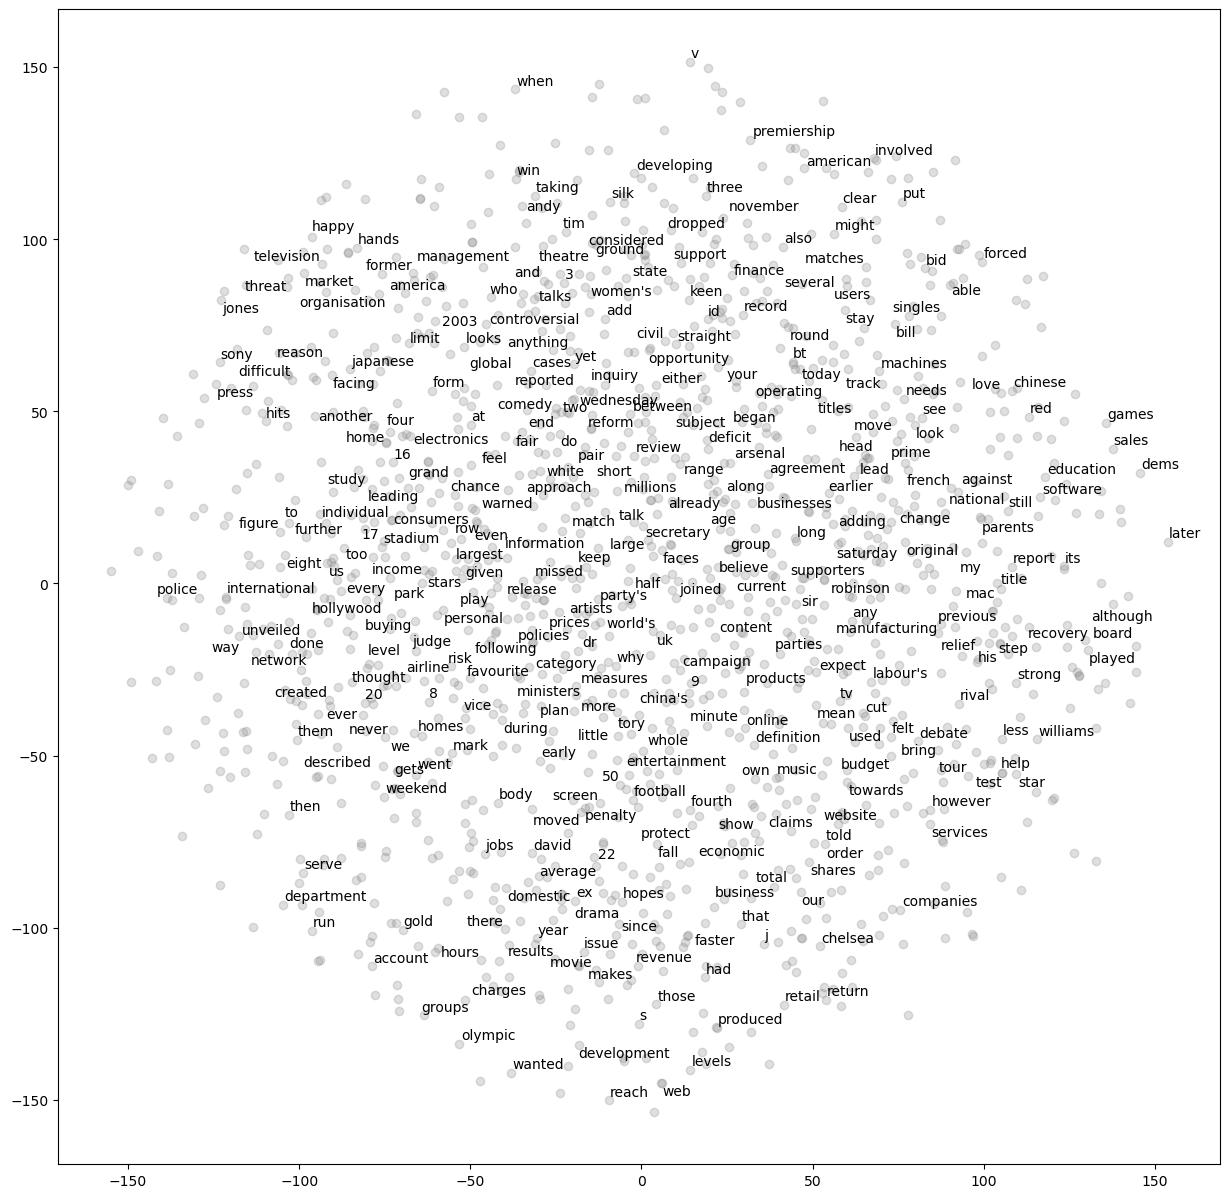

In [70]:
plot(tsne_embeddings[1:1501], skipgram_words[1:1501])

### For CBOW

Fitting embeddings to T-SNE. This can take some time ...
Plotting 1500 points
Adjusting text annotations in the plot. This may take some time: Annotations 359


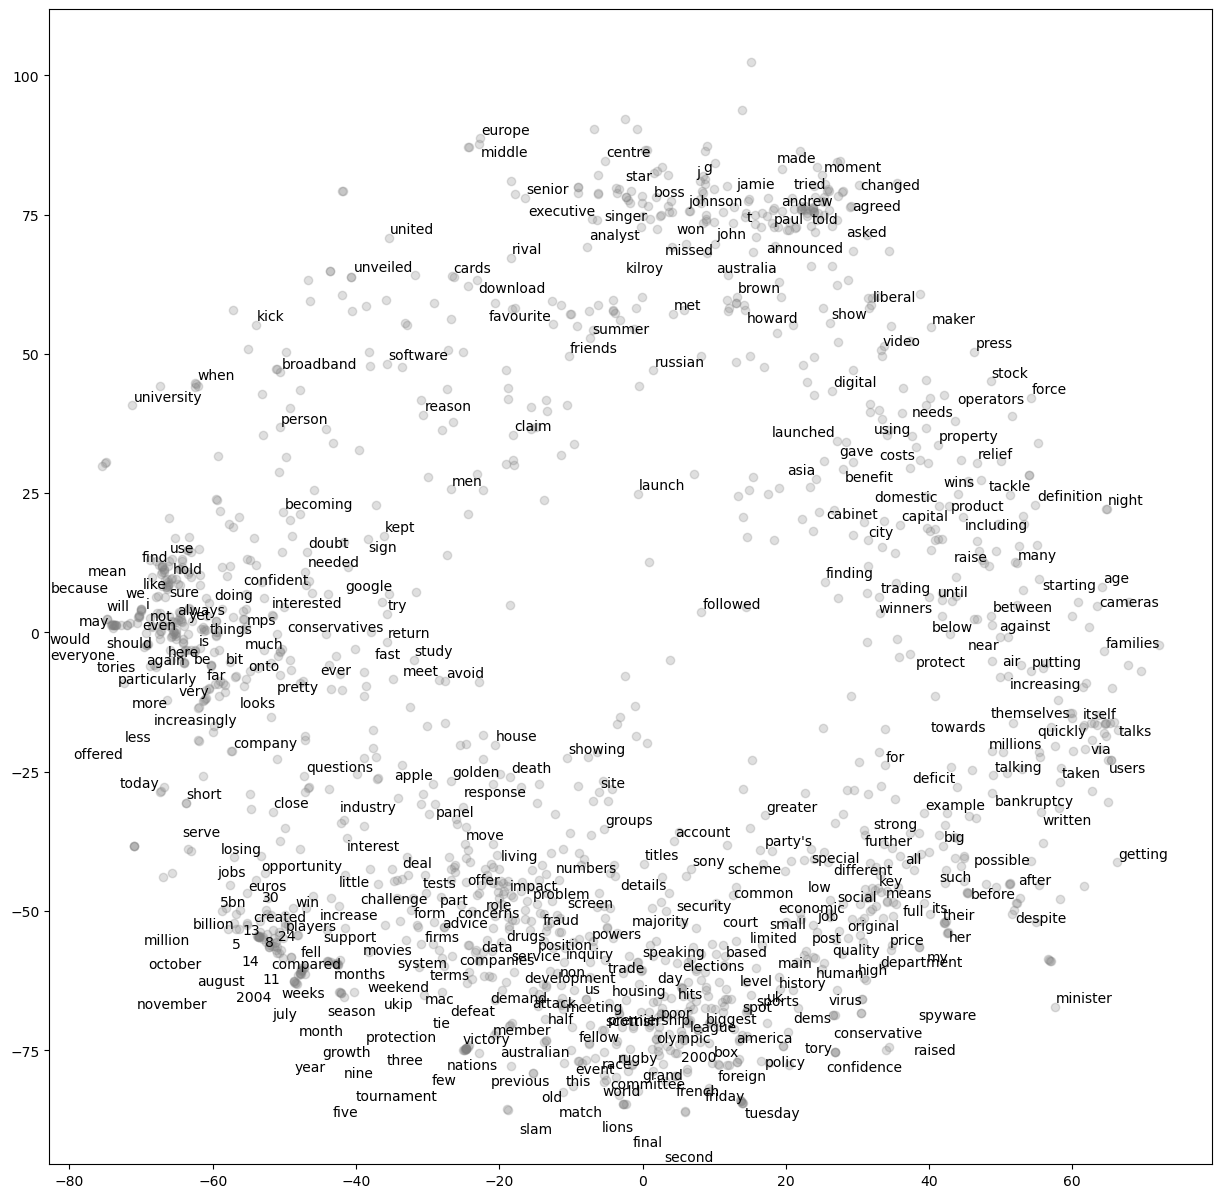

In [71]:
cbow_context_embeddings = pd.read_pickle(
    os.path.join('cbow_embeddings', 'context_embedding.pkl')
)

cbow_words, cbow_embeddings = np.array(cbow_context_embeddings.index), cbow_context_embeddings.values

tsne = TSNE(perplexity=30, n_components=2, n_iter=5000, metric='cosine')

print('Fitting embeddings to T-SNE. This can take some time ...')
# get the T-SNE manifold

cbow_embeddings_norm = cbow_embeddings / np.sum(cbow_embeddings**2, keepdims=True, axis=1)
cbow_tsne_embeddings = tsne.fit_transform(cbow_embeddings_norm)

plot(cbow_tsne_embeddings[1:1501], cbow_words[1:1501])